### AN OVERVIEW INTO DECISION TREES AND MOTIVATION


* Decision Tree models can help us predict both numeric and categorical outcomes. In this project, the classification tree I'm building is a type of decision tree. In this case, I'm interested in predicting if a specific stock will go UP or DOWN in the future, in other words, a categorical outcome. The motivation came from the fact that I seek to solidify my understanding of classification trees, and also because I'm an active investor in VTI. 


Here's a resource that explains the logic behind a classification tree.

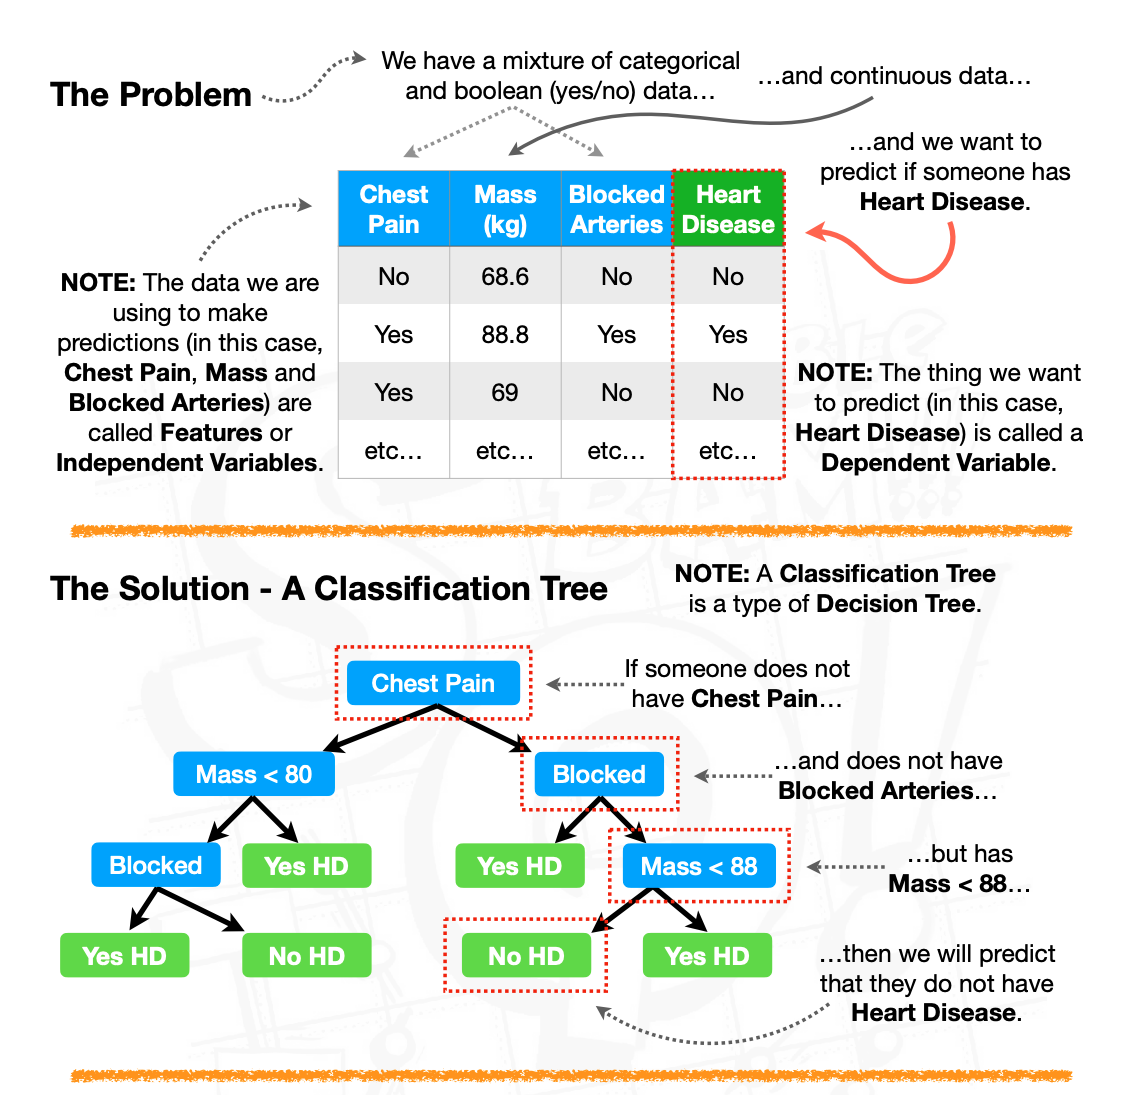 - Credits: Josh Starmer



In [1]:
# =============================================
# IMPORTING THE Y FINANCE LIBRARY
#==============================================
import yfinance # to download financial data
import numpy as np # for numerical operations
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # to draw graphs
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import ConfusionMatrixDisplay # creates and draws a confusion matrix
# downloading VTI data from Yahoo Finance
data = yfinance.download('VTI',period='max',auto_adjust=False)
# adjusting the dataframe columns
columns = data.columns.droplevel(1)
data.columns = columns
# dropping the unadjusted Close column and renaming the Adj Close column to Close
data = data.drop(columns=['Close']).rename(columns={'Adj Close':'Close'})
# calculating the difference in Close price and shifting it to get tomorrow's direction
diff = data.Close.diff()
diff = diff.shift(-1)
data['Stock Direction Tomorrow'] = diff
data['Direction'] = np.where(data['Stock Direction Tomorrow'] > 0, 'Up','Down') 
data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Stock Direction Tomorrow,Direction
Date,,,,,,,
2001-06-15,36.129860,56.005001,55.174999,55.424999,1067400,-0.230423,Down
2001-06-18,35.899437,55.915001,55.310001,55.814999,282600,0.100601,Up
2001-06-19,36.000038,56.165001,55.235001,56.150002,1777600,0.379711,Up
2001-06-20,36.379749,56.075001,55.375000,55.375000,476000,0.292065,Up
2001-06-21,36.671814,56.724998,55.875000,56.000000,240400,-0.233639,Down
...,...,...,...,...,...,...,...
2025-11-24,328.640015,329.190002,324.940002,325.510010,4167600,3.519989,Up
2025-11-25,332.160004,332.660004,326.760010,328.640015,3654300,2.279999,Up
2025-11-26,334.440002,335.489990,332.959991,333.320007,2745500,1.869995,Up


In [8]:
financial_model = DecisionTreeClassifier()
Y = data['Direction']
X = data.drop(columns=['Direction','Stock Direction Tomorrow'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
financial_model = financial_model.fit(X_train, y_train)

In [2]:
plt.figure(figsize=(15, 7.5))
plot_tree(financial_model,
          filled=True,
          rounded=True,
          class_names=['Up','Down'],
          feature_names=X.columns)

NameError: name 'financial_model' is not defined

<Figure size 1500x750 with 0 Axes>

### THE BASICS BEHIND THE CONFUSION MATRIX
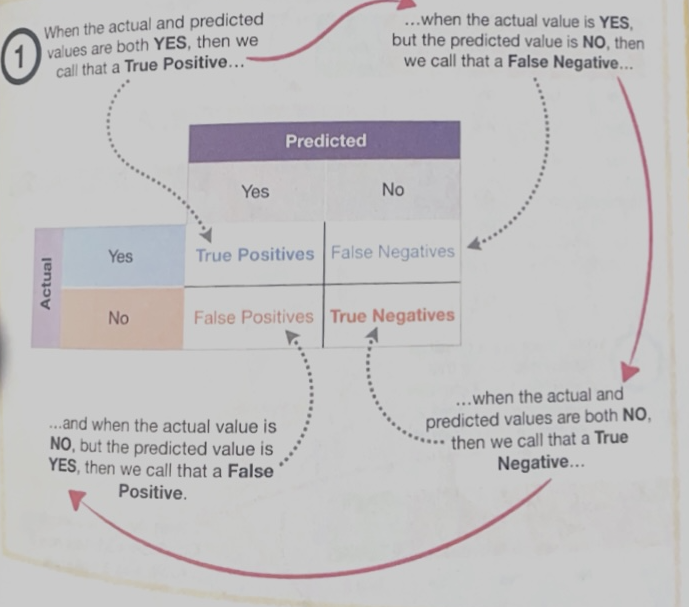

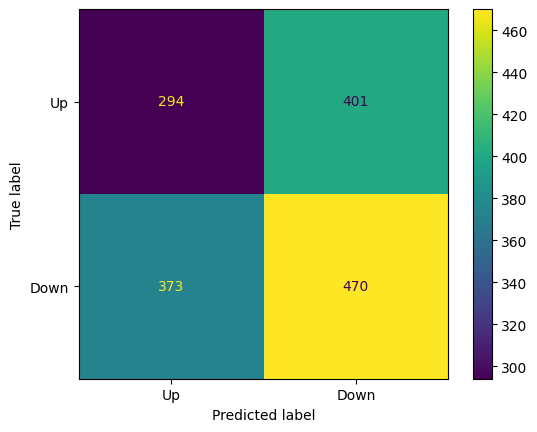

In [11]:
ConfusionMatrixDisplay.from_estimator(financial_model,
                                      X_test,
                                      y_test,
                                      display_labels=["Up", "Down"])

* Here the - True Positives (Given the model predicted the market to be 'up' when the observed value was 'up'.) is 
    * True Posives = 294 - TP
* False Negatives (Given the model predicted the market to be down when the observed values was actually up)
    * False negatives = 401 - FN
* False positives given (The model predicted the market to be 'up' when the observed value was actually 'down')
   * False positives = 373 - FP
* True negatives (Given the model predicted the market to be 'down' when the observed values are 'down') 
    * True Negatives = 470 - TN

In the confusion matrix, we see that of the 294 + 401 = 695 observation where the stock market was up for VTI only a 42% of this values where
correctly classified. And when the stock market was down 373+470 = 843, 55% of this observations where correctly classified. 